In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("Round 1 Data FCB.xlsx")
dfb = pd.read_excel("Round 1 Data FCRR.xlsx")
df.head()


,Date,GSP,Temp,Wind_Speed,Precip_Amount,Chill,Solar_Rad,Humidity,Cloud_Cover,Unnamed: 9,Demand
0,2014-04-01,F,7.339581,2.031250,0.219479,21.790098,392.083333,97.291667,7.095833,NaN,864.0620
1,2014-04-02,F,5.251040,3.229167,0.019167,41.064574,125.416667,100.000000,7.783333,NaN,882.8143
2,2014-04-03,F,5.842707,3.604167,0.068750,43.915093,134.583333,100.000000,7.960416,NaN,891.3996
3,2014-04-04,F,7.183331,2.343750,0.032187,24.404681,180.416667,98.583333,6.991666,NaN,862.8675
4,2014-04-05,F,9.519789,2.145833,0.077500,16.851037,295.000000,92.833333,6.520833,NaN,867.4235


In [258]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

#regr = linear_model.LinearRegression(normalize=True)
#regr = linear_model.Ridge (alpha = 1)
#regr = linear_model.Lasso(alpha = 10)
#regr = linear_model.ElasticNet(alpha = 0.1,max_iter=1000)
#regr = linear_model.Lars()
#regr = linear_model.LarsLasso()
#regr=linear_model.OrthogonalMatchingPursuit() 
#regr=linear_model.BayesianRidge()
#regr=linear_model.SGDRegressor()
#regr=linear_model.PassiveAggressiveRegressor(max_iter=1000) 
#regr=linear_model.TheilSenRegressor()
#regr=linear_model.HuberRegressor()

#regr=ensemble.RandomForestRegressor(n_estimators=1000,max_features=1)

regr=MLPRegressor(hidden_layer_sizes=(6,), random_state=1, max_iter=10000, solver='lbfgs', learning_rate_init=0.0001,alpha=1e-10,batch_size=1)


X=[]
Y = [float(x) for x in df["Demand"]]
print(df["Date"][0].month)
for index,i in df.iterrows():
    if index>732:
        pass
    l = []
    l.append(i["Temp"])
    l.append(i["Wind_Speed"])
    l.append(i["Precip_Amount"])
    l.append(i["Chill"])
    l.append(i["Solar_Rad"])
    #l.append(i["Humidity"])
    l.append(i["Cloud_Cover"])
    #l.append(i["Date"].month)
    X.append(l)

X_valid = X[-56:-1]
Y_result = Y[-56:-1]



#Remove the last 55 points from the traingin set
X_train=X[:-55]
Y_train=Y[:-55]
print("{0},{1}, PredictionSet {2}".format(len(X),len(Y),len(X_valid)))

scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)



4
732,732, PredictionSet 55


In [256]:
#regr.normalize = True

#XTR=PolynomialFeatures(interaction_only=True).fit_transform(X_train)
regr.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=1e-10, batch_size=1, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [248]:
#regr.coef_


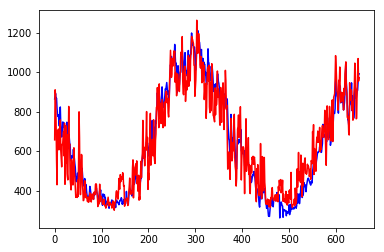

In [249]:
#Block of code to graph predictions


result =regr.predict(X_train)

#for i in X:
#    print(i)
#    result.append(regr.predict(i))
ran= 650
rang = np.arange(ran)


plt.figure(1)
plt.clf()
plt.plot(rang,Y[0:ran],'b')

plt.plot(rang,result[0:ran],'r')
plt.show()


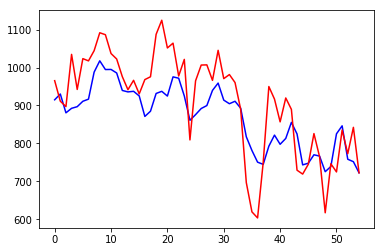

In [250]:
plt.figure(2)
Model_Result = regr.predict(X_valid)
ran= len(X_valid)
rang = np.arange(ran)

plt.figure(1)
plt.clf()
plt.plot(rang,Y_result,'b')

plt.plot(rang,Model_Result,'r')
plt.show()

In [251]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(Y_result,Model_Result)
print(mse)

7122.00081126
